In [1]:
import tensorflow as tf
print(tf.__version__)

2.12.0-rc1


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
dataset=pd.read_csv('train.csv')
dataset.head()

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,1,17183,1540,117961,118343,123125,118536,118536,308574,118539
2,1,36724,14457,118219,118220,117884,117879,267952,19721,117880
3,1,36135,5396,117961,118343,119993,118321,240983,290919,118322
4,1,42680,5905,117929,117930,119569,119323,123932,19793,119325


In [4]:
X=dataset.iloc[:,1:10]
y=dataset.iloc[:,0]
X.shape,y.shape

((32769, 9), (32769,))

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

In [6]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [7]:
X_train.shape

(26215, 9)

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout


In [9]:
classifier=Sequential()

classifier.add(Dense(units=9,activation='relu'))

classifier.add(Dense(units=7,activation='relu'))

classifier.add(Dense(units=6,activation='relu'))

classifier.add(Dense(units=1,activation='sigmoid'))

In [10]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [12]:
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)


In [13]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=100,callbacks=early_stopping)

Epoch 1/100


C:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\data_adapter.py:1700: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


1757/1757 [==============================] - 3s 2ms/step - loss: 0.2446 - accuracy: 0.9415 - val_loss: 0.2264 - val_accuracy: 0.9424
Epoch 2/100
1757/1757 [==============================] - 3s 2ms/step - loss: 0.2230 - accuracy: 0.9415 - val_loss: 0.2220 - val_accuracy: 0.9424
Epoch 3/100
1757/1757 [==============================] - 4s 2ms/step - loss: 0.2199 - accuracy: 0.9415 - val_loss: 0.2203 - val_accuracy: 0.9424
Epoch 4/100
1757/1757 [==============================] - 6s 3ms/step - loss: 0.2189 - accuracy: 0.9415 - val_loss: 0.2198 - val_accuracy: 0.9424
Epoch 5/100
1757/1757 [==============================] - 4s 2ms/step - loss: 0.2179 - accuracy: 0.9415 - val_loss: 0.2193 - val_accuracy: 0.9424
Epoch 6/100
1757/1757 [==============================] - 3s 2ms/step - loss: 0.2173 - accuracy: 0.9415 - val_loss: 0.2200 - val_accuracy: 0.9424
Epoch 7/100
1757/1757 [==============================] - 5s 3ms/step - loss: 0.2168 - accuracy: 0.9415 - val_loss: 0.2188 - val_accuracy: 0.94

In [14]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

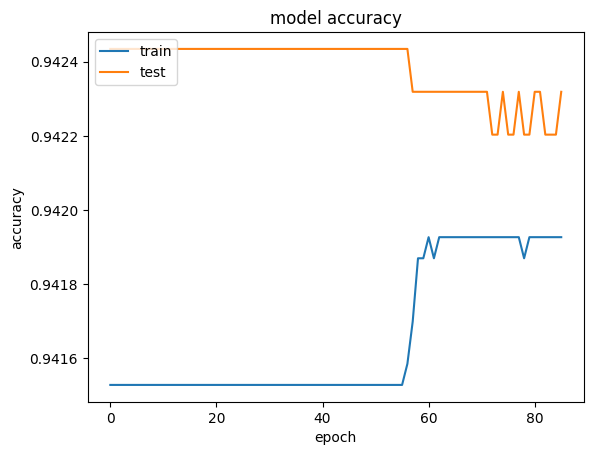

In [15]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

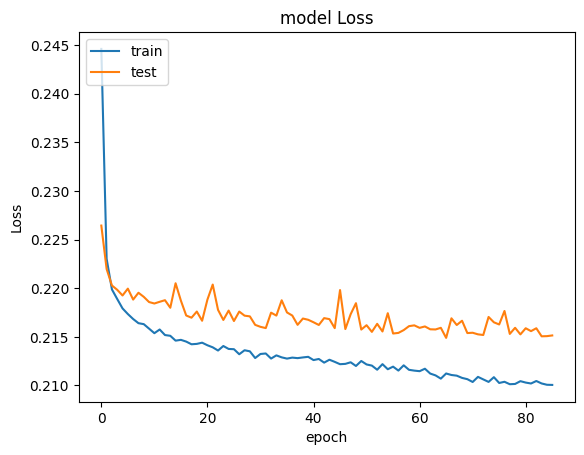

In [16]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [17]:
y_pred=classifier.predict(X_test)
y_pred=(y_pred>=0.5)

205/205 [==============================] - 0s 794us/step


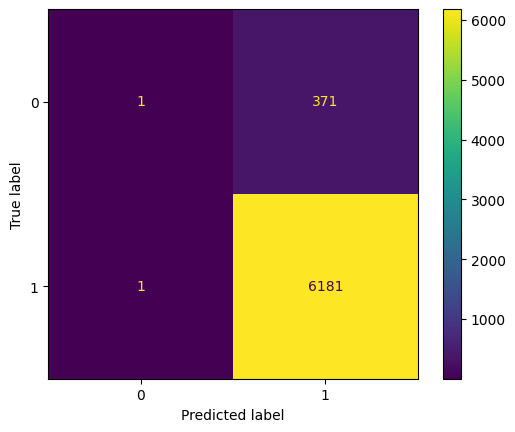

In [21]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,accuracy_score
cm=confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

94.3240768996033

In [32]:
from scipy import sparse

train_ohe = sparse.load_npz('train_ohe.npz')
train_ohe_array = train_ohe.toarray()
train_ohe = pd.DataFrame(train_ohe_array)

In [36]:
train_ohe.head()

,0,1,2,3,4,5,6,7,8,9,...,4490,4491,4492,4493,4494,4495,4496,4497,4498,4499
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
X=train_ohe
y=dataset.iloc[:,0]
X.shape,y.shape

((32769, 4500), (32769,))

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

In [45]:
classifier=Sequential()

classifier.add(Dense(units=4500,activation='relu'))

classifier.add(Dense(units=7,activation='relu'))

classifier.add(Dense(units=6,activation='relu'))

classifier.add(Dense(units=1,activation='sigmoid'))

In [46]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [47]:
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [48]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=100,callbacks=early_stopping)

Epoch 1/100


C:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\data_adapter.py:1700: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


 831/1757 [=============>................] - ETA: 4:22 - loss: 0.2166 - accuracy: 0.9396

KeyboardInterrupt: 